In [ ]:
import requests
import pandas as pd

base_url = "https://ml-project-12-5c6c7f5005fe.herokuapp.com/api/surveys/" #API deployed using Heroku

data_list = []
#get the first 100 rows from db, we get only the first 100 because getting the full data takes longer than 60 secs.
for id in range(1, 101):
    url = f"{base_url}{id}"
    response = requests.get(url) #use method get

    if response.status_code == 200:
        data = response.json()
        data_list.append(data)
    else:
        print(f"Failed to retrieve data for ID {id}. Status Code: {response.status_code}")

# Create a DataFrame from the collected data
df = pd.DataFrame(data_list)

# Now we can work with the DataFrame


In [ ]:
!pip install psycopg2

In [ ]:
#This code makes a direct connection with the db and extract the FULL info from the table to transform it into a dataframe
import pandas as pd
import psycopg2

# db credentials
db_user = "postgres"
db_password = "Ml2023.1"
db_host = "ml-db-instance.c0tl5vuvxgtt.us-east-1.rds.amazonaws.com"
db_name = "initial_db"
db_port = 5432

# Define the connection string
db_uri = f"mysql://{db_user}:{db_password}@{db_host}/{db_name}"

# Establish a connection to the RDS instance
connection = psycopg2.connect(
    host=db_host,
    port=db_port,
    database=db_name,
    user=db_user,
    password=db_password
)

table_name = "surveys_data"

# Query to select data from the table
query = f"SELECT * FROM {table_name}"

# Use pandas to read the data into a DataFrame
df_total = pd.read_sql(query, connection)

# Now 'df_total' contains the data from your RDS table in a DataFrame
df_total.head()

# Now we can analyze this data and reduce the dimension

<ipython-input-2-90da73552919>:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_total = pd.read_sql(query, connection)


,id,date_created,codigo,nivdep,nivans,nivest,nivsoled,nivideasuic,nivresil,nivsatvida,...,nivest1,p138r,p139r,p140r,indideasuic,ideamuerte,ideacsuic,punresil,punsatvida,punrecpsic
0,1,2023-10-28 18:02:05.231534,1,leve / moderado,severo / extremadamente severo,severo / extremadamente severo,normal,Sin indicadores,media,Media,...,severo,0,0,0,SIn indicadores,No,No,4.0,8.0,38.0
1,2,2023-10-28 18:02:05.231534,3,severo / extremadamente severo,severo / extremadamente severo,severo / extremadamente severo,severo,Sin indicadores,media,Media,...,extremadamente severo,0,0,0,SIn indicadores,No,No,3.0,7.0,23.0
2,3,2023-10-28 18:02:05.231534,11,normal,severo / extremadamente severo,severo / extremadamente severo,severo,Sin indicadores,media,Alta,...,severo,0,0,0,SIn indicadores,No,No,4.0,11.0,30.0
3,4,2023-10-28 18:02:05.231534,16,normal,normal,normal,normal,Sin indicadores,media,Alta,...,normal,0,0,0,SIn indicadores,No,No,1.0,11.0,37.0
4,5,2023-10-28 18:02:05.231534,17,severo / extremadamente severo,severo / extremadamente severo,severo / extremadamente severo,severo,Sin indicadores,baja,Media,...,extremadamente severo,0,0,0,SIn indicadores,No,No,3.0,8.0,24.0


In [ ]:
df_total.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2786 entries, 0 to 2785
Columns: 249 entries, id to punrecpsic
dtypes: datetime64[ns](1), float64(30), int64(2), object(216)
memory usage: 5.3+ MB


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Automatically detect nominal columns (object dtype)
nominal_columns = df_total.select_dtypes(include=['object']).columns.tolist()

# Apply label encoding to each nominal column
label_encoder = LabelEncoder()
df_total[nominal_columns] = df_total[nominal_columns].apply(lambda col: label_encoder.fit_transform(col))

# Now, df contains label-encoded values for nominal columns


In [ ]:
df_total.head()

,id,date_created,codigo,nivdep,nivans,nivest,nivsoled,nivideasuic,nivresil,nivsatvida,...,nivest1,p138r,p139r,p140r,indideasuic,ideamuerte,ideacsuic,punresil,punsatvida,punrecpsic
0,1,2023-10-28 18:02:05.231534,1,1,3,3,2,1,3,3,...,5,0,0,0,3,0,0,4.0,8.0,38.0
1,2,2023-10-28 18:02:05.231534,3,3,3,3,3,1,3,3,...,1,0,0,0,3,0,0,3.0,7.0,23.0
2,3,2023-10-28 18:02:05.231534,11,2,3,3,3,1,3,1,...,5,0,0,0,3,0,0,4.0,11.0,30.0
3,4,2023-10-28 18:02:05.231534,16,2,2,2,2,1,3,1,...,4,0,0,0,3,0,0,1.0,11.0,37.0
4,5,2023-10-28 18:02:05.231534,17,3,3,3,3,1,2,3,...,1,0,0,0,3,0,0,3.0,8.0,24.0


In [ ]:
column = df_total[df_total['cvsssnosabe'] != 0]['cvsssnosabe']
print(column)

5       1
29      1
32      1
113     1
125     1
136     1
164     1
213     1
229     1
317     1
376     1
450     1
483     1
509     1
518     1
608     1
672     1
699     1
737     1
749     1
789     1
866     1
939     1
967     1
998     1
1020    1
1077    1
1149    1
1345    1
1442    1
1618    1
1659    1
1664    1
1667    1
1708    1
1769    1
1883    1
1893    1
1918    1
1963    1
1975    1
2104    1
2229    1
2238    1
2343    1
2359    1
2426    1
2539    1
2557    1
2561    1
2575    1
2588    1
2593    1
2736    1
2750    1
Name: cvsssnosabe, dtype: int64


In [ ]:
#cvingreshogar
clumn = df_total[df_total['cvingreshogar'] != 0]['cvingreshogar']
print(clumn)

0       2
1       8
2       6
3       8
4       8
       ..
2781    5
2782    6
2783    1
2784    6
2785    8
Name: cvingreshogar, Length: 2723, dtype: int64


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

columns_to_drop = ['date_created','id','codigo']
df_numerical = df_total.drop(columns=columns_to_drop)

# List of numerical columns
numerical_columns = df_numerical.columns

# Standardization
scaler = StandardScaler()
df_numerical[numerical_columns] = scaler.fit_transform(df_numerical[numerical_columns])

# Min-Max Scaling
minmax_scaler = MinMaxScaler()
df_numerical[numerical_columns] = minmax_scaler.fit_transform(df_numerical[numerical_columns])



In [ ]:
# Use pandas' corr() method to get correlation matrix
corr_matrix = df_numerical.corr().abs()
print(corr_matrix)

               nivdep    nivans    nivest  nivsoled  nivideasuic  nivresil  \
nivdep       1.000000  0.277589  0.315711  0.245348     0.288314  0.103619   
nivans       0.277589  1.000000  0.393298  0.121414     0.165400  0.151383   
nivest       0.315711  0.393298  1.000000  0.147999     0.193742  0.167299   
nivsoled     0.245348  0.121414  0.147999  1.000000     0.229734  0.026588   
nivideasuic  0.288314  0.165400  0.193742  0.229734     1.000000  0.096664   
...               ...       ...       ...       ...          ...       ...   
ideamuerte   0.285152  0.162471  0.191067  0.224463     0.984859  0.092699   
ideacsuic    0.187374  0.108740  0.119097  0.187631     0.561465  0.060498   
punresil     0.334533  0.485140  0.469642  0.196416     0.223122  0.193476   
punsatvida   0.301404  0.218279  0.251266  0.218363     0.304688  0.211016   
punrecpsic   0.294003  0.234060  0.253439  0.204000     0.259854  0.264814   

             nivsatvida  nivrecpsic  rpsoptimis  rpsinterotros 

In [ ]:
import pandas as pd
import numpy as np

# Set the correlation threshold
threshold = 0.8

# Use pandas' corr() method to get the correlation matrix
corr_matrix = df_numerical.corr().abs()

# Print the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Identify highly correlated features
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
highly_correlated_features = [(col, upper.columns[idx], corr_matrix[col][upper.columns[idx]]) for idx, col in enumerate(upper.columns) if any(upper[col] > threshold)]

# Print highly correlated features
print("\nHighly Correlated Features:")
for feature in highly_correlated_features:
    print(f"{feature[0]} and {feature[1]} have correlation {feature[2]}")



Correlation Matrix:
               nivdep    nivans    nivest  nivsoled  nivideasuic  nivresil  \
nivdep       1.000000  0.277589  0.315711  0.245348     0.288314  0.103619   
nivans       0.277589  1.000000  0.393298  0.121414     0.165400  0.151383   
nivest       0.315711  0.393298  1.000000  0.147999     0.193742  0.167299   
nivsoled     0.245348  0.121414  0.147999  1.000000     0.229734  0.026588   
nivideasuic  0.288314  0.165400  0.193742  0.229734     1.000000  0.096664   
...               ...       ...       ...       ...          ...       ...   
ideamuerte   0.285152  0.162471  0.191067  0.224463     0.984859  0.092699   
ideacsuic    0.187374  0.108740  0.119097  0.187631     0.561465  0.060498   
punresil     0.334533  0.485140  0.469642  0.196416     0.223122  0.193476   
punsatvida   0.301404  0.218279  0.251266  0.218363     0.304688  0.211016   
punrecpsic   0.294003  0.234060  0.253439  0.204000     0.259854  0.264814   

             nivsatvida  nivrecpsic  rpsopt

<ipython-input-17-600adc6d01d1>:15: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [ ]:
#Identify outliers

# List of numerical columns
numerical_columns = df_numerical.columns

for column in numerical_columns:
    # Calculate IQR
    Q1 = df_numerical[column].quantile(0.25)
    Q3 = df_numerical[column].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers using IQR method
    outliers = df_numerical[(df_numerical[column] < Q1 - 1.5 * IQR) | (df_numerical[column] > Q3 + 1.5 * IQR)]

    # Print or handle outliers as needed
    #print(f"Outliers in {column}:")
    #print(outliers)


In [ ]:
# Display descriptive statistics
print(df_numerical.describe())


            nivdep       nivans       nivest     nivsoled  nivideasuic  \
count  2786.000000  2786.000000  2786.000000  2786.000000  2786.000000   
mean      0.716439     0.763580     0.758315     0.593802     0.893396   
std       0.283314     0.292229     0.296895     0.280056     0.308665   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.333333     0.666667     0.666667     0.333333     1.000000   
50%       0.666667     1.000000     1.000000     0.666667     1.000000   
75%       1.000000     1.000000     1.000000     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          nivresil   nivsatvida   nivrecpsic   rpsoptimis  rpsinterotros  ...  \
count  2786.000000  2786.000000  2786.000000  2786.000000    2786.000000  ...   
mean      0.748983     0.639268     0.754128     0.488945       0.492175  ...   
std       0.307503     0.318846     0.289947     0.304838       0.315949  ...   
min      

In [ ]:
# Check for missing values
print(df_numerical.isnull().sum())


nivdep         0
nivans         0
nivest         0
nivsoled       0
nivideasuic    0
              ..
ideamuerte     0
ideacsuic      0
punresil       0
punsatvida     0
punrecpsic     0
Length: 246, dtype: int64


In [ ]:
# Use visualization libraries like matplotlib or seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Pairplot
sns.pairplot(df_numerical)
plt.show()


In [ ]:
#PCA
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Assuming the target variable is named 'mental_health_issue'
X = df_numerical.drop('ideamuerte', axis=1)  # Features
y = df_numerical['ideamuerte']  # Target variable

# Handle missing values (replace with mean, median, or drop columns/rows)
X.fillna(X.mean(), inplace=True)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Determine the number of components to retain a significant percentage of variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1  # Retain 95% of variance

# Retrain PCA with the selected number of components
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)

# Get the most important features contributing to the first principal component
important_features_indices = np.argsort(np.abs(pca.components_[0]))[::-1]
top_20_features = X.columns[important_features_indices[:20]]

# Display the top 20 most important features
print("Top 20 Most Important Features:")
print(top_20_features)


Top 20 Most Important Features:
Index(['pundep', 'punbienpsico', 'punest', 'punans', 'punbiensoc',
       'punrecpsic', 'punbienespir', 'punbienfis', 'punsatvida', 'punresil',
       'nivdep1', 'punfuncfliar', 'punsueno', 'punbienambie', 'nivsatvida',
       'biesoc', 'nivans1', 'biefisico', 'fpsfuncfliar1', 'fpsapoyosoc1'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X_pca is the result of PCA and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{confusion_mat}")


Accuracy: 0.9372759856630825
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97       497
         1.0       1.00      0.43      0.60        61

    accuracy                           0.94       558
   macro avg       0.97      0.71      0.78       558
weighted avg       0.94      0.94      0.93       558

Confusion Matrix:
[[497   0]
 [ 35  26]]


Accuracy: 0.9372

The overall accuracy of the model is approximately 93.72%. Accuracy represents the proportion of correctly classified instances among all instances.
Classification Report:

Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives.
Recall (Sensitivity): Recall is the ratio of correctly predicted positive observations to all actual positives.
F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.
Support: The number of actual occurrences of the class in the specified dataset.


```
# Esto tiene formato de código
             precision    recall  f1-score   support
0.0          0.93         1.00      0.97        497
1.0          1.00         0.43      0.60         61

accuracy                           0.94       558
macro avg      0.97         0.71      0.78       558
weighted avg   0.94         0.94      0.93       558

```

For class 0 (negative class): Precision is 0.93, Recall is 1.00, and F1-score is 0.97.
For class 1 (positive class): Precision is 1.00, Recall is 0.43, and F1-score is 0.60.
The weighted average of precision, recall, and F1-score is also provided.
Confusion Matrix:



```
# Esto tiene formato de código
[[497   0]
 [ 35  26]]

```

The confusion matrix shows the counts of true positive, true negative, false positive, and false negative predictions.

In this case, there are 497 true negatives (TN), 26 true positives (TP), 35 false negatives (FN), and 0 false positives (FP).

Interpretation:
The model is performing very well in predicting class 0 (negative class) with high precision, recall, and F1-score.
However, for class 1 (positive class), the recall is relatively low (0.43), indicating that the model is not capturing all instances of this class.
The high precision for class 1 suggests that when the model predicts class 1, it is usually correct.

The macro and weighted averages provide a summary measure considering both classes, giving more weight to the larger class (class 0).
Depending on the specific goals and requirements of your project, you might want to consider additional strategies to improve the model's performance, especially in terms of recall for class 1. This could involve adjusting the classification threshold, trying different models, or performing further feature engineering.


<ipython-input-10-721d64a86eb0>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


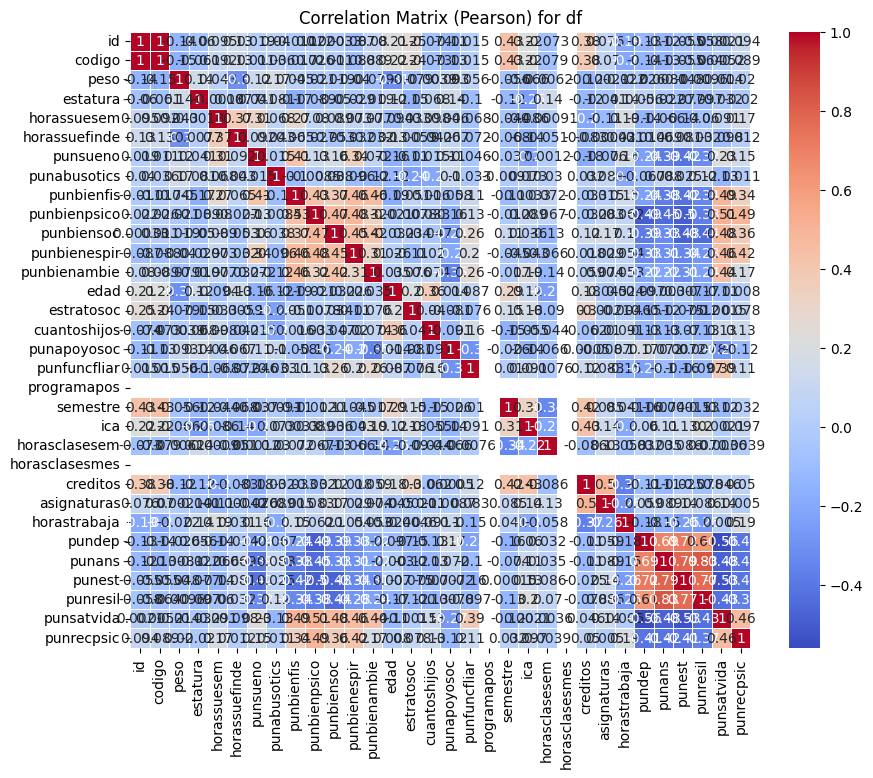

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación de Pearson
correlation_matrix = df.corr(method='pearson')

# Crear un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix (Pearson) for df")
plt.show()

In [ ]:
#This code makes a direct connection with the db and extract the FULL info from the table to transform it into a dataframe
import pandas as pd
import psycopg2

# db credentials
db_user = "postgres"
db_password = "Ml2023.1"
db_host = "ml-db-instance.c0tl5vuvxgtt.us-east-1.rds.amazonaws.com"
db_name = "initial_db"
db_port = 5432

# Define the connection string
db_uri = f"mysql://{db_user}:{db_password}@{db_host}/{db_name}"

# Establish a connection to the RDS instance
connection = psycopg2.connect(
    host=db_host,
    port=db_port,
    database=db_name,
    user=db_user,
    password=db_password
)

table_name = "surveys_data"

# Query to select data from the table
query = f"SELECT * FROM {table_name}"

# Use pandas to read the data into a DataFrame
df_total = pd.read_sql(query, connection)

<ipython-input-18-ca9ddfc5ea21>:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.


In [ ]:
!pip install pca

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 5.2 MB/s eta 0:00:00


In [ ]:
# Get the data types of all columns
column_data_types = df.dtypes

# Filter for columns with a string data type
string_columns = column_data_types[column_data_types == 'object'].index

# Now, 'string_columns' contains the names of columns with string data type
print(string_columns)

Index(['nivdep', 'nivans', 'nivest', 'nivsoled', 'nivideasuic', 'nivresil',
       'nivsatvida', 'nivrecpsic', 'rpsoptimis', 'rpsinterotros',
       ...
       'ambalim5', 'nivdep1', 'nivans1', 'nivest1', 'p138r', 'p139r', 'p140r',
       'indideasuic', 'ideamuerte', 'ideacsuic'],
      dtype='object', length=216)


In [ ]:
distinct_values = df['nivdep'].drop_duplicates().tolist()
print(distinct_values)


['leve / moderado', 'severo / extremadamente severo', 'normal', '']


In [ ]:
distinct_values_per_column = {}  # Create a dictionary to store distinct values for each column

for column in df.columns:
    distinct_values = df[column].drop_duplicates().tolist()
    distinct_values_per_column[column] = distinct_values

# distinct_values_per_column now contains distinct values for each column
for column, distinct_values in distinct_values_per_column.items():
    print(f"Distinct values in {column}: {distinct_values}")

Distinct values in id: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217,

In [ ]:
# Define a mapping of distinct values to numeric values
value_mapping = {
    'leve / moderado': 1,
    'severo / extremadamente severo': 2,
    'normal': 3,
    '': 0
}

# Replace the values in the 'nivdep' column using the mapping
df['nivdep'] = df['nivdep'].replace(value_mapping)

# Now, the 'nivdep' column contains numeric values
print(df)


        id  codigo  nivdep                          nivans  \
0        1       1       1  severo / extremadamente severo   
1        2       3       2  severo / extremadamente severo   
2        3      11       3  severo / extremadamente severo   
3        4      16       3                          normal   
4        5      17       2  severo / extremadamente severo   
...    ...     ...     ...                             ...   
2781  2782    6918       2  severo / extremadamente severo   
2782  2783    6920       2                 leve / moderado   
2783  2784    6926       2  severo / extremadamente severo   
2784  2785    6943       1                 leve / moderado   
2785  2786    6950       2  severo / extremadamente severo   

                              nivest nivsoled          nivideasuic nivresil  \
0     severo / extremadamente severo   normal      Sin indicadores    media   
1     severo / extremadamente severo   severo      Sin indicadores    media   
2     severo / ext

In [ ]:
# Define a mapping of distinct values to numeric values
value_mapping = {
    'leve / moderado': 1,
    'severo / extremadamente severo': 2,
    'normal': 3,
    '': 0
}

# Replace the values in the 'nivdep' column using the mapping
df['nivans'] = df['nivans'].replace(value_mapping)

# Now, the 'nivdep' column contains numeric values
df.head()

,id,codigo,nivdep,nivans,nivest,nivsoled,nivideasuic,nivresil,nivsatvida,nivrecpsic,...,nivest1,p138r,p139r,p140r,indideasuic,ideamuerte,ideacsuic,punresil,punsatvida,punrecpsic
0,1,1,1,2,severo / extremadamente severo,normal,Sin indicadores,media,Media,Alto,...,severo,0,0,0,SIn indicadores,No,No,4.0,8.0,38.0
1,2,3,2,2,severo / extremadamente severo,severo,Sin indicadores,media,Media,Bajo,...,extremadamente severo,0,0,0,SIn indicadores,No,No,3.0,7.0,23.0
2,3,11,3,2,severo / extremadamente severo,severo,Sin indicadores,media,Alta,Medio,...,severo,0,0,0,SIn indicadores,No,No,4.0,11.0,30.0
3,4,16,3,3,normal,normal,Sin indicadores,media,Alta,Alto,...,normal,0,0,0,SIn indicadores,No,No,1.0,11.0,37.0
4,5,17,2,2,severo / extremadamente severo,severo,Sin indicadores,baja,Media,Bajo,...,extremadamente severo,0,0,0,SIn indicadores,No,No,3.0,8.0,24.0


In [ ]:
# Define a mapping of distinct values to numeric values
value_mapping = {
    'leve / moderado': 1,
    'severo / extremadamente severo': 2,
    'normal': 3,
    '': 0
}

# Replace the values in the 'nivdep' column using the mapping
df['nivest'] = df['nivest'].replace(value_mapping)

# Now, the 'nivdep' column contains numeric values
df.head()

,id,codigo,nivdep,nivans,nivest,nivsoled,nivideasuic,nivresil,nivsatvida,nivrecpsic,...,nivest1,p138r,p139r,p140r,indideasuic,ideamuerte,ideacsuic,punresil,punsatvida,punrecpsic
0,1,1,1,2,2,normal,Sin indicadores,media,Media,Alto,...,severo,0,0,0,SIn indicadores,No,No,4.0,8.0,38.0
1,2,3,2,2,2,severo,Sin indicadores,media,Media,Bajo,...,extremadamente severo,0,0,0,SIn indicadores,No,No,3.0,7.0,23.0
2,3,11,3,2,2,severo,Sin indicadores,media,Alta,Medio,...,severo,0,0,0,SIn indicadores,No,No,4.0,11.0,30.0
3,4,16,3,3,3,normal,Sin indicadores,media,Alta,Alto,...,normal,0,0,0,SIn indicadores,No,No,1.0,11.0,37.0
4,5,17,2,2,2,severo,Sin indicadores,baja,Media,Bajo,...,extremadamente severo,0,0,0,SIn indicadores,No,No,3.0,8.0,24.0


In [ ]:
# Define a mapping of distinct values to numeric values
value_mapping = {
    'moderado': 1,
    'severo': 2,
    'normal': 3,
    '': 0
}

# Replace the values in the 'nivdep' column using the mapping
df['nivsoled'] = df['nivsoled'].replace(value_mapping)

# Now, the 'nivdep' column contains numeric values
df.head()

,id,codigo,nivdep,nivans,nivest,nivsoled,nivideasuic,nivresil,nivsatvida,nivrecpsic,...,nivest1,p138r,p139r,p140r,indideasuic,ideamuerte,ideacsuic,punresil,punsatvida,punrecpsic
0,1,1,1,2,2,3,Sin indicadores,media,Media,Alto,...,severo,0,0,0,SIn indicadores,No,No,4.0,8.0,38.0
1,2,3,2,2,2,2,Sin indicadores,media,Media,Bajo,...,extremadamente severo,0,0,0,SIn indicadores,No,No,3.0,7.0,23.0
2,3,11,3,2,2,2,Sin indicadores,media,Alta,Medio,...,severo,0,0,0,SIn indicadores,No,No,4.0,11.0,30.0
3,4,16,3,3,3,3,Sin indicadores,media,Alta,Alto,...,normal,0,0,0,SIn indicadores,No,No,1.0,11.0,37.0
4,5,17,2,2,2,2,Sin indicadores,baja,Media,Bajo,...,extremadamente severo,0,0,0,SIn indicadores,No,No,3.0,8.0,24.0


In [ ]:
# Define a mapping of distinct values to numeric values
value_mapping = {
    'Con algun indicador': 1,
    'Sin indicadores': 0
}

# Replace the values in the 'nivdep' column using the mapping
df['nivideasuic'] = df['nivideasuic'].replace(value_mapping)

# Now, the 'nivdep' column contains numeric values
df.head()

,id,codigo,nivdep,nivans,nivest,nivsoled,nivideasuic,nivresil,nivsatvida,nivrecpsic,...,nivest1,p138r,p139r,p140r,indideasuic,ideamuerte,ideacsuic,punresil,punsatvida,punrecpsic
0,1,1,1,2,2,3,0,media,Media,Alto,...,severo,0,0,0,SIn indicadores,No,No,4.0,8.0,38.0
1,2,3,2,2,2,2,0,media,Media,Bajo,...,extremadamente severo,0,0,0,SIn indicadores,No,No,3.0,7.0,23.0
2,3,11,3,2,2,2,0,media,Alta,Medio,...,severo,0,0,0,SIn indicadores,No,No,4.0,11.0,30.0
3,4,16,3,3,3,3,0,media,Alta,Alto,...,normal,0,0,0,SIn indicadores,No,No,1.0,11.0,37.0
4,5,17,2,2,2,2,0,baja,Media,Bajo,...,extremadamente severo,0,0,0,SIn indicadores,No,No,3.0,8.0,24.0


In [ ]:
# Define a mapping of distinct values to numeric values
value_mapping = {
    'media': 1,
    'alta': 2,
    'baja': 3,
    '': 0
}

# Replace the values in the 'nivdep' column using the mapping
df['nivresil'] = df['nivresil'].replace(value_mapping)

# Now, the 'nivdep' column contains numeric values
df.head()

,id,codigo,nivdep,nivans,nivest,nivsoled,nivideasuic,nivresil,nivsatvida,nivrecpsic,...,nivest1,p138r,p139r,p140r,indideasuic,ideamuerte,ideacsuic,punresil,punsatvida,punrecpsic
0,1,1,1,2,2,3,0,1,Media,Alto,...,severo,0,0,0,SIn indicadores,No,No,4.0,8.0,38.0
1,2,3,2,2,2,2,0,1,Media,Bajo,...,extremadamente severo,0,0,0,SIn indicadores,No,No,3.0,7.0,23.0
2,3,11,3,2,2,2,0,1,Alta,Medio,...,severo,0,0,0,SIn indicadores,No,No,4.0,11.0,30.0
3,4,16,3,3,3,3,0,1,Alta,Alto,...,normal,0,0,0,SIn indicadores,No,No,1.0,11.0,37.0
4,5,17,2,2,2,2,0,3,Media,Bajo,...,extremadamente severo,0,0,0,SIn indicadores,No,No,3.0,8.0,24.0


In [ ]:
df.shape, df.nivdep.nunique()

((2786, 248), 4)

In [ ]:
df.head()

,id,codigo,nivdep,nivans,nivest,nivsoled,nivideasuic,nivresil,nivsatvida,nivrecpsic,...,nivest1,p138r,p139r,p140r,indideasuic,ideamuerte,ideacsuic,punresil,punsatvida,punrecpsic
0,1,1,1,2,2,3,0,1,Media,Alto,...,severo,0,0,0,SIn indicadores,No,No,4.0,8.0,38.0
1,2,3,2,2,2,2,0,1,Media,Bajo,...,extremadamente severo,0,0,0,SIn indicadores,No,No,3.0,7.0,23.0
2,3,11,3,2,2,2,0,1,Alta,Medio,...,severo,0,0,0,SIn indicadores,No,No,4.0,11.0,30.0
3,4,16,3,3,3,3,0,1,Alta,Alto,...,normal,0,0,0,SIn indicadores,No,No,1.0,11.0,37.0
4,5,17,2,2,2,2,0,3,Media,Bajo,...,extremadamente severo,0,0,0,SIn indicadores,No,No,3.0,8.0,24.0


In [ ]:
variables = [col for col in df if df[col].dtypes in [int, float]]

In [ ]:
len(variables)

38

In [ ]:
pca_pipeline = Pipeline(
    [
        ('scaler', preprocessing.StandardScaler()),
        ('pca', PCA(random_state=0))
    ]
)

pca_pipeline.fit(df[variables])

transformed_data = pd.DataFrame(pca_pipeline.transform(df[variables]))
transformed_data.columns = [f'component_{i+1}' for i in range(transformed_data.shape[1])]
transformed_data

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_29,component_30,component_31,component_32,component_33,component_34,component_35,component_36,component_37,component_38
0,0.700071,-0.220698,1.793508,-2.345201,0.032753,0.576461,0.837184,-0.376720,0.448438,0.302846,...,0.779664,-1.009971,-1.050847,0.320440,0.406182,0.016795,0.082898,-0.066245,0.033521,-6.156677e-16
1,2.706890,-0.661347,1.499237,-1.885007,0.584476,0.908905,-0.713832,-0.383503,0.020036,0.206985,...,0.988033,-0.316879,0.276386,-0.296102,-0.522796,0.034608,0.019487,-0.023811,0.041037,-1.960275e-16
2,-0.571662,-0.990365,1.104084,-1.851215,-1.338633,0.251922,0.414139,-0.442936,0.233516,-0.828251,...,0.739507,0.380562,0.393451,0.845545,0.697731,0.431040,-0.111224,-0.040793,0.052448,1.728899e-16
3,-2.467163,-1.716348,1.328893,-1.503423,-0.051616,1.123557,-1.574546,1.240307,0.179559,-0.625440,...,0.499955,0.322604,1.120302,0.213829,0.163967,0.069920,0.420700,-0.061781,0.054352,6.301181e-17
4,0.915541,-2.387234,0.865664,-0.981893,-0.538681,0.915705,0.262453,0.639708,-1.431109,1.363069,...,0.494143,0.026855,0.940012,-0.512129,0.129589,-0.647910,-0.029428,-0.036476,0.056027,-2.622963e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2781,5.529634,1.455617,-1.199948,1.637342,-1.123022,0.759812,0.492476,1.270823,-1.809412,0.359782,...,0.202593,0.107350,-0.469498,-0.401590,-0.360180,-0.008729,-0.288346,-0.017400,0.098901,-1.651195e-16
2782,-0.045629,1.714922,-1.260008,1.435199,0.777639,-0.147493,0.248770,0.450122,-0.706931,1.153411,...,0.338820,-0.755072,0.494877,-1.560477,-0.937081,0.072447,0.216428,-0.021733,0.102088,3.228882e-16
2783,3.038804,2.964705,-0.678377,1.494213,0.307864,0.962567,-1.537592,-0.307743,0.925129,-1.177423,...,0.231774,0.278663,0.231659,0.349851,0.020028,-0.542483,-0.344778,-0.165855,0.103506,1.331440e-16
2784,-1.487368,2.500403,-1.225155,1.234827,0.203243,0.052583,0.628300,-0.816312,0.463872,0.375044,...,0.002283,0.070423,-0.607314,-0.427435,-0.127525,0.321878,0.336309,-0.020949,0.115977,5.120583e-16


In [ ]:
graph_data = pd.DataFrame(pca_pipeline['pca'].explained_variance_ratio_.cumsum(), columns=['explained_variance']).reset_index()

graph = pn.ggplot(graph_data, pn.aes(x='index', y='explained_variance')) + pn.geom_col() + pn.xlab('Component') + pn.scale_y_continuous(labels=percent_format())
graph.draw()

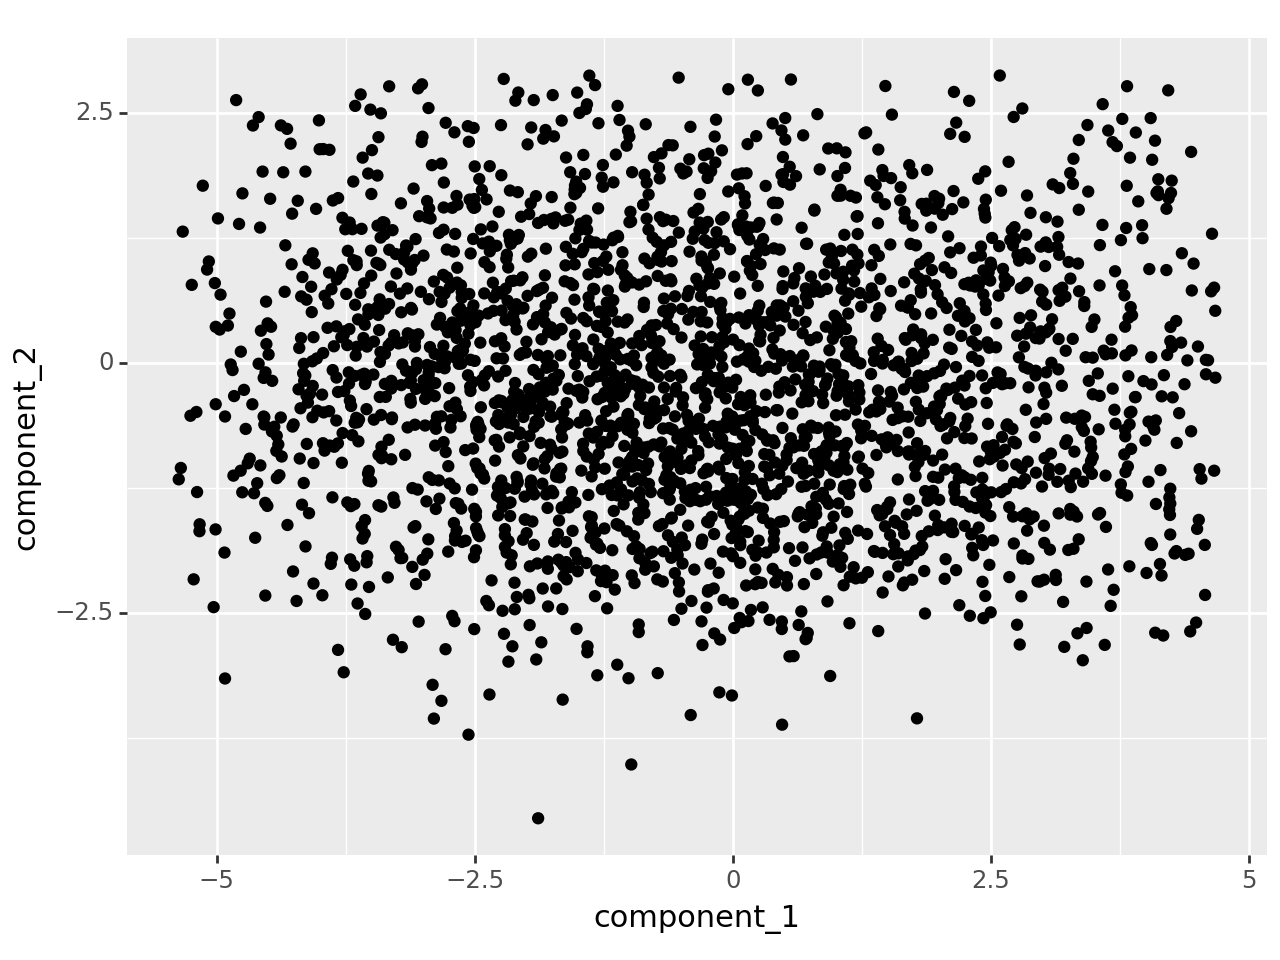

In [ ]:
limit_x = transformed_data.component_1.quantile(0.95)
limit_y = transformed_data.component_2.quantile(0.95)

condition = (transformed_data.component_1 < limit_x) & (transformed_data.component_2 < limit_y)

graph = (
    pn.ggplot(transformed_data[condition], pn.aes(x='component_1', y='component_2'))
    + pn.geom_point()
)

graph.draw()

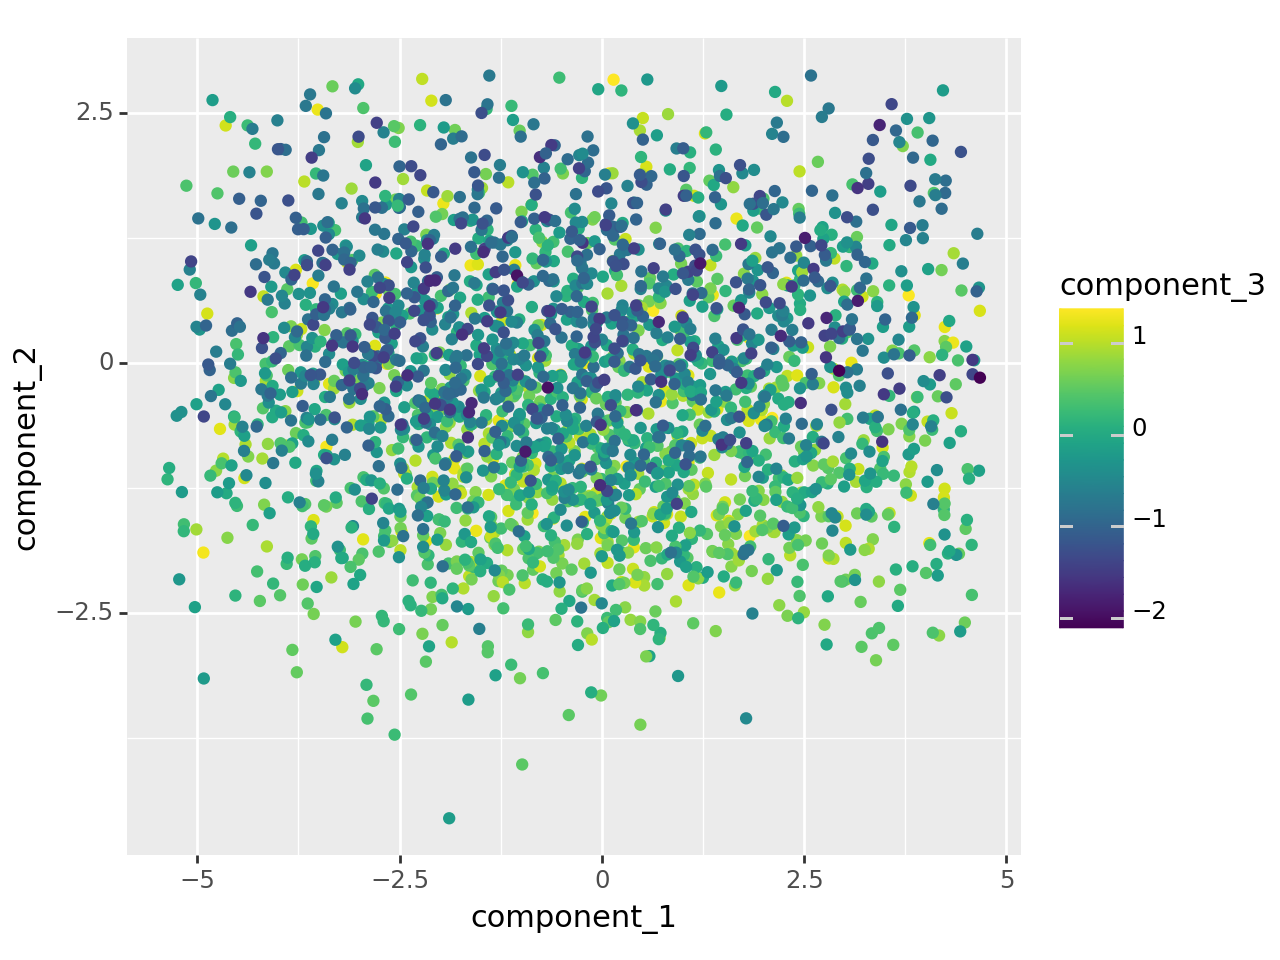

In [ ]:
limit_x = transformed_data.component_1.quantile(0.95)
limit_y = transformed_data.component_2.quantile(0.95)
limit_z = transformed_data.component_3.quantile(0.95)

condition = (transformed_data.component_1 < limit_x) & (transformed_data.component_2 < limit_y) & (transformed_data.component_3 < limit_z)

graph = (
    pn.ggplot(transformed_data[condition], pn.aes(x='component_1', y='component_2', color='component_3'))
    + pn.geom_point()
)

graph.draw()

In [ ]:
model = pca(n_components=3)
scaler = preprocessing.StandardScaler()
results = model.fit_transform(scaler.fit_transform(df[variables]))

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [38] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [ ]:
help(model.biplot)

Help on method biplot in module pca.pca:

biplot(labels=None, c=[0, 0.1, 0.4], s=150, marker='o', edgecolor='#000000', jitter=None, n_feat=None, PC=None, SPE=None, HT2=None, alpha=0.8, gradient=None, density=False, density_on_top=False, fontcolor=[0, 0, 0], fontsize=18, fontweight='normal', color_arrow=None, arrowdict={'fontsize': None, 'color_text': None, 'weight': None, 'alpha': None, 'color_strong': '#880808', 'color_weak': '#002a77', 'scale_factor': None}, cmap='tab20c', title=None, legend=None, figsize=(25, 15), visible=True, fig=None, ax=None, dpi=100, grid=True, y=None, label=None, verbose=None) method of pca.pca.pca instance
    Create Biplot.
    
    Plots the Principal components with the samples, and the best performing features.
    Per PC, The feature with absolute highest loading is gathered. This can result into features that are seen over multiple PCs, and some features may never be detected.
    For vizualization purposes we will keep only the unique feature-names and